In [135]:
import random
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt

def generate_points(length, height, num_points):
    """
    Generates a list of random points within a given length and height, and plots them in a scatter plot.

    Args:
        length (float): The length of the rectangular area to generate points within.
        height (float): The height of the rectangular area to generate points within.
        num_points (int): The number of points to generate.

    Returns:
        Tuple[List[Tuple[float, float]], List[List[float]]]: A tuple containing:
        - A list of (x, y) coordinate tuples representing the generated points.
        - A list of lists containing the pairwise distances between the generated points.
    """
    points = []
    for i in range(num_points):
        x = random.uniform(0, length)
        y = random.uniform(0, height)
        points.append((x, y))

    # Plot the points in a scatter plot
    sns.set_style('darkgrid')
    plt.figure(figsize=(6, 4))
    ax = sns.scatterplot(x=[p[0] for p in points], y=[p[1] for p in points])
    plt.title('Scatter Plot of Generated Points')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

    # Calculate the pairwise distances between the points
    distances = []
    for i in range(num_points):
        row = []
        for j in range(num_points):
            dist = sqrt((points[i][0] - points[j][0]) ** 2 + (points[i][1] - points[j][1]) ** 2)
            row.append(dist)
        distances.append(row)

    return points, distances


In [136]:
length = 10.0
height = 5.0
num_points = 136
#num_points = 10


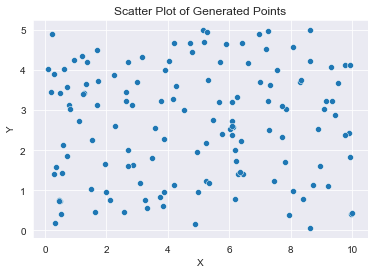

Generated Points: [(1.966622412133382, 1.653621950195749), (8.385113808199177, 0.7788418792434454), (8.613383840104184, 4.227939231424878), (7.815865658341029, 1.7117095300274139), (6.60715818508915, 4.174082214757875), (9.05974360181776, 3.039137200316653), (1.2619452311698132, 3.4384746012101166), (7.826824691609637, 3.030636621262836), (4.169583806020711, 3.281417872719659), (8.302498611259958, 3.689719736294274), (0.7909453042781489, 3.11975123390942), (0.611213003270723, 4.018464240238054), (6.085212688043988, 2.7342757076305486), (3.7320308500169452, 0.8297380952346473), (8.60757392374188, 4.98846258111353), (5.249089518193601, 1.2185948188876288), (7.261707582152511, 4.970977221622215), (8.331778316453578, 3.7510930441871504), (6.408466336623716, 4.670322417661394), (6.213779393656637, 1.7286367192671481), (8.932020937455544, 1.6043039794485874), (2.6997954585248074, 4.20525269118101), (1.516173311294906, 2.262847817981144), (4.983843283015442, 0.9636821081339103), (0.1022878015

In [137]:
points, distances = generate_points(length, height, num_points)
print('Generated Points:', points)
print('Pairwise Distances:', distances)

In [138]:
import itertools

def find_shortest_route(points):
    """
    Finds the shortest route between a set of points using the nearest neighbor algorithm.

    Args:
        points (List[Tuple[float, float]]): A list of (x, y) coordinate tuples representing the points.

    Returns:
        Tuple[List[int], float]: A tuple containing:
        - A list of point indices representing the shortest route.
        - The length of the shortest route.
    """
    num_points = len(points)

    # Create a matrix to store the distances between points
    distances = [[0] * num_points for _ in range(num_points)]
    for i in range(num_points):
        for j in range(num_points):
            dist = sqrt((points[i][0] - points[j][0]) ** 2 + (points[i][1] - points[j][1]) ** 2)
            distances[i][j] = dist

    # Choose a random starting point
    current_point = random.randint(0, num_points - 1)

    # Initialize the route with the starting point
    route = [current_point]

    # Loop until all points have been visited
    while len(route) < num_points:
        # Find the nearest unvisited neighbor
        nearest_neighbor = None
        nearest_distance = float('inf')
        for i in range(num_points):
            if i not in route and distances[current_point][i] < nearest_distance:
                nearest_neighbor = i
                nearest_distance = distances[current_point][i]

        # Add the nearest neighbor to the route
        route.append(nearest_neighbor)

        # Set the nearest neighbor as the current point
        current_point = nearest_neighbor

    # Calculate the length of the route
    length = 0
    for i in range(num_points):
        length += distances[route[i]][route[(i + 1) % num_points]]

    return route, length


In [139]:
shortest_route, shortest_length = find_shortest_route(points)

In [140]:
from typing import List, Tuple
from math import sqrt
from random import randrange

def two_opt_algorithm(points: List[Tuple[float, float]], shortest_route: List[int], shortest_length: float, max_iterations: int=1000) -> Tuple[List[int], float]:
    """
    Applies the 2-opt algorithm to a given set of points and a known shortest route.

    Args:
        points (List[Tuple[float, float]]): A list of (x, y) coordinate tuples representing the points.
        shortest_route (List[int]): A list of point indices representing the shortest route.
        shortest_length (float): The length of the shortest route.
        max_iterations (int): The maximum number of iterations to run.

    Returns:
        Tuple[List[int], float]: A tuple containing:
        - A list of point numbers representing the optimized route.
        - The length of the optimized route.
    """
    # Create a dictionary mapping each point to its index in the list
    point_dict = {point: i for i, point in enumerate(points)}

    # Create a list of indices for the shortest route
    indices = shortest_route.copy()

    # Define a function to calculate the length of a route
    def calculate_length(route: List[int]) -> float:
        length = 0
        for i in range(len(route) - 1):
            dist = sqrt((points[route[i]][0] - points[route[i+1]][0]) ** 2 + (points[route[i]][1] - points[route[i+1]][1]) ** 2)
            length += dist
        return length

    # Initialize the best route and length to the shortest route and length
    best_route = indices.copy()
    best_length = shortest_length

    # Loop for the maximum number of iterations
    for i in range(max_iterations):

        # Choose two random indices in the route
        idx1, idx2 = sorted([randrange(len(points)) for _ in range(2)])

        # Reverse the subroute between the two indices
        new_route = indices[:idx1] + indices[idx1:idx2+1][::-1] + indices[idx2+1:]

        # Calculate the length of the new route
        new_length = calculate_length(new_route)

        # If the new route is shorter, update the best route and length
        if new_length < best_length:
            best_route = new_route.copy()
            best_length = new_length

        # Update the indices for the next iteration
        indices = best_route.copy()

    # Convert the indices back to point numbers
    optimized_route = [list(point_dict.keys())[list(point_dict.values()).index(idx)] for idx in best_route]

    # Convert the optimized route from points to point numbers
    optimized_route = [points.index(point) + 1 for point in optimized_route]

    return optimized_route, best_length


In [141]:
optimized_route, optimized_length = two_opt_algorithm(points, shortest_route, shortest_length)


In [142]:
shortest_length - optimized_length

5.694569176975975